**Import Libraries**

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

**Load the Data**

In [13]:
# Read data from CSV files
covid_data1 = pd.read_csv("/content/us-counties-2020.csv")
covid_data2 = pd.read_csv("/content/us-counties-2021.csv")
covid_data3 = pd.read_csv("/content/us-counties-2022.csv")

**Preprocessing and Data Analysis**

In [14]:
# Combine data from three years into a single DataFrame
combined_data = pd.concat([covid_data1, covid_data2, covid_data3])

# Convert 'date' column to datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

In [15]:
# Get unique counties
unique_counties = combined_data['county'].unique()

**Save the charts as Images**

In [16]:
# Create a folder named 'county_charts22' to save the images
output_folder = 'county_charts22'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

In [17]:
# Group data by 'date', 'county', and calculate the new covid cases for each county across all years
for county in unique_counties:
    county_data = combined_data[combined_data['county'] == county]
    grouped_data = county_data.groupby(['date'])['cases'].sum()

    # Calculate new cases for each county
    daily_diff = grouped_data.diff().fillna(0)  # Compute difference between consecutive days

    # Plotting line chart for new COVID cases for each county
    plt.figure(figsize=(12, 6))
    plt.plot(daily_diff.index, daily_diff.values, marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('Difference in COVID Cases (Today - Yesterday)')
    plt.title(f'Difference in COVID Cases (Today - Yesterday) for {county}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot as an image inside the 'county_charts22' folder
    file_path = os.path.join(output_folder, f'{county}_daily_cases_diff.png')
    plt.savefig(file_path)
    plt.close()


**Zip and Download the Folder**

In [18]:
!zip -r /content/file.zip /content/county_charts22/

updating: content/county_charts22/ (stored 0%)
updating: content/county_charts22/Evans_daily_cases_diff.png (deflated 8%)
updating: content/county_charts22/Boyd_daily_cases_diff.png (deflated 7%)
updating: content/county_charts22/Adjuntas_daily_cases_diff.png (deflated 8%)
updating: content/county_charts22/Sharp_daily_cases_diff.png (deflated 8%)
updating: content/county_charts22/Rutland_daily_cases_diff.png (deflated 11%)
updating: content/county_charts22/San Saba_daily_cases_diff.png (deflated 11%)
updating: content/county_charts22/Grand Isle_daily_cases_diff.png (deflated 13%)
updating: content/county_charts22/McKean_daily_cases_diff.png (deflated 7%)
updating: content/county_charts22/Lowndes_daily_cases_diff.png (deflated 9%)
updating: content/county_charts22/Cocke_daily_cases_diff.png (deflated 9%)
updating: content/county_charts22/Fajardo_daily_cases_diff.png (deflated 9%)
updating: content/county_charts22/Hanover_daily_cases_diff.png (deflated 10%)
updating: content/county_chart

In [19]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Line chart for Cook County**

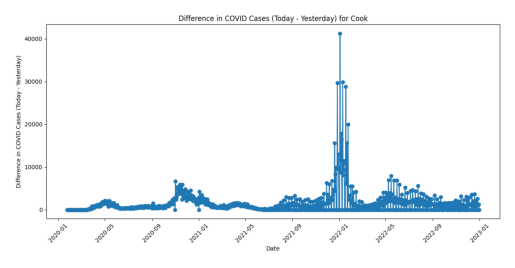

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the saved image file
image_path = 'county_charts22/Cook_daily_cases_diff.png'

# Load and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()
